# GPT-2 - Modelos de Linguagem são Aprendizes Multitarefa Não Supervisionados

 > Aviso: Este post foi traduzido para o português usando um modelo de tradução automática. Por favor, me avise se encontrar algum erro.

## Artigo

[Language Models are Unsupervised Multitask Learners](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf) é o paper do GPT-2. Esta é a segunda versão do modelo [GPT-1](https://maximofn.com/gpt1/) que já vimos.

## Arquitetura

Antes de falar sobre a arquitetura do GPT-2, vamos lembrar como era a arquitetura do GPT-1.
![arquitetura do gpt1](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/GPT1_architecture.webp)

Em GPT-2 é utilizada uma arquitetura baseada em transformers, assim como [GPT-1](https://maximofn.com/gpt1/), com os seguintes tamanhos
|Parâmetros|Camadas|d_model||---|---|---||117M| 12| 768|| 345M| 24| 1024|| 762M| 36| 1280|| 1542M| 48| 1600|
O modelo mais pequeno é equivalente ao GPT original, e o segundo mais pequeno é equivalente ao modelo maior do BERT. O modelo maior tem mais de uma ordem de magnitude mais parâmetros que o GPT.

Além disso, foram realizadas as seguintes modificações na arquitetura
* Adiciona-se uma camada de normalização antes do bloco de atenção. Isso pode ajudar a estabilizar o treinamento do modelo e melhorar sua capacidade de aprender representações mais profundas. Ao normalizar as entradas de cada bloco, reduz-se a variabilidade nas saídas e facilita-se o treinamento do modelo* Foi adicionada uma normalização adicional após o bloco de auto-atenção final. Isso pode ajudar a reduzir a variabilidade nas saídas do modelo e melhorar sua estabilidade.* Na maioria dos modelos, os pesos das camadas são inicializados aleatoriamente, seguindo uma distribuição normal ou uniforme. No entanto, no caso do GPT-2, os autores decidiram utilizar uma inicialização modificada que leva em conta a profundidade do modelo. A ideia por trás dessa inicialização modificada é que, à medida que o modelo se torna mais profundo, o sinal que flui através das camadas residuais vai enfraquecendo. Isso ocorre porque cada camada residual é somada à entrada original, o que pode fazer com que o sinal vá atenuando com a profundidade do modelo. Para contrariar esse efeito, decidiram escalar os pesos das camadas residuais na inicialização por um fator de 1/√N, onde N é o número de camadas residuais. Isso significa que, à medida que o modelo se torna mais profundo, os pesos das camadas residuais ficam menores. Este truque de inicialização pode ajudar a estabilizar o treinamento do modelo e a melhorar sua capacidade de aprender representações mais profundas. Ao escalar os pesos das camadas residuais, reduz-se a variabilidade nas saídas de cada camada e facilita-se o fluxo do sinal através do modelo. Em resumo, a inicialização modificada no GPT-2 é utilizada para contrariar o efeito de atenuação do sinal nas camadas residuais, o que ajuda a estabilizar o treinamento do modelo e a melhorar sua capacidade de aprender representações mais profundas.* O tamanho do vocabulário expandiu-se para 50.257. Isso significa que o modelo pode aprender a representar um conjunto mais amplo de palavras e tokens.* O tamanho do contexto foi aumentado de 512 para 1024 tokens. Isso permite que o modelo leve em conta um contexto mais amplo ao gerar texto.
![GPT1 vs GPT-2 architecture](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/GPT1_vs_GPT2_architecture.webp)

## Resumo do artigo

As ideias mais interessantes do paper são:
* Para o pré-treinamento do modelo, pensaram em usar uma fonte de texto diversa e quase ilimitada, como web scraping de Common Crawl. No entanto, descobriram que havia texto de qualidade muito baixa. Então, usaram o dataset WebText, que também provinha de web scraping, mas com um filtro de qualidade, como a quantidade de links de saída do Reddit, etc. Além disso, removeram o texto proveniente da Wikipedia, pois poderia estar repetido em outras páginas.* Utilizaram um tokenizador BPE que já explicamos em um [post](https://maximofn.com/bpe/) anterior

## Geração de texto

Vamos a ver como gerar texto com um GPT-2 pré-treinado

Para gerar texto vamos utilizar o modelo do repositório [GPT-2](https://huggingface.co/openai-community/gpt2) da Hugging Face.

### Geração de texto com pipeline

Com esse modelo já podemos usar o pipeline de transformers

In [3]:
from transformers import pipeline

checkpoints = "openai-community/gpt2-xl"
generator = pipeline('text-generation', model=checkpoints)
output = generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)
for i, o in enumerate(output):
    print(f"Output {i+1}: {o['generated_text']}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Output 1: Hello, I'm a language model, and I want to change the way you read

A little in today's post I want to talk about
Output 2: Hello, I'm a language model, with two roles: the language model and the lexicographer-semantics expert. The language models are going
Output 3: Hello, I'm a language model, and this is your brain. Here is your brain, and all this data that's stored in there, that
Output 4: Hello, I'm a language model, and I like to talk... I want to help you talk to your customers

Are you using language model
Output 5: Hello, I'm a language model, I'm gonna tell you about what type of language you're using. We all know a language like this,


### Geração de texto com automodel

Mas se quisermos utilizar `Automodel`, podemos fazer o seguinte

In [2]:
import torch
from transformers import GPT2Tokenizer, AutoTokenizer

checkpoints = "openai-community/gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(checkpoints)
auto_tokenizer = AutoTokenizer.from_pretrained(checkpoints)

Assim como com [GPT-1](https://maximofn.com/gpt1/#Generaci%C3%B3n-de-texto) podemos importar `GPT2Tokenizer` e `AutoTokenizer`. Isso é porque na [model card](https://huggingface.co/openai-community/gpt2) do GPT-2 indica-se que se use `GPT2Tokenizer`, mas no post da biblioteca [transformers](https://maximofn.com/hugging-face-transformers/) explicamos que deve-se usar `AutoTokenizer` para carregar o tokenizador. Então vamos testar os dois.

In [3]:
checkpoints = "openai-community/gpt2-xl"
tokenizer = GPT2Tokenizer.from_pretrained(checkpoints)
auto_tokenizer = AutoTokenizer.from_pretrained(checkpoints)

input_tokens = tokenizer("Hello, I'm a language model,", return_tensors="pt")
input_auto_tokens = auto_tokenizer("Hello, I'm a language model,", return_tensors="pt")

print(f"input tokens: \n{input_tokens}")
print(f"input auto tokens: \n{input_auto_tokens}")

input tokens: 
{'input_ids': tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
input auto tokens: 
{'input_ids': tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


Como pode ser visto com os dois tokenizadores, são obtidos os mesmos tokens. Assim, para que o código seja mais geral, de maneira que, se forem alterados os checkpoints, não seja necessário alterar o código, vamos utilizar `AutoTokenizer`.

Criamos então o dispositivo, o tokenizador e o modelo

In [2]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

checkpoints = "openai-community/gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(checkpoints)
model = GPT2LMHeadModel.from_pretrained(checkpoints).to(device)

Como instanciamos o modelo, vamos a ver quantos parâmetros ele tem.

In [3]:
params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {round(params/1e6)}M")

Number of parameters: 1558M


Como vemos, carregamos o modelo com 1,5B de parâmetros, mas se quiséssemos carregar os outros modelos teríamos que fazer

In [5]:
checkpoints_small = "openai-community/gpt2"
model_small = GPT2LMHeadModel.from_pretrained(checkpoints_small)
print(f"Number of parameters of small model: {round(sum(p.numel() for p in model_small.parameters())/1e6)}M")

checkpoints_medium = "openai-community/gpt2-medium"
model_medium = GPT2LMHeadModel.from_pretrained(checkpoints_medium)
print(f"Number of parameters of medium model: {round(sum(p.numel() for p in model_medium.parameters())/1e6)}M")

checkpoints_large = "openai-community/gpt2-large"
model_large = GPT2LMHeadModel.from_pretrained(checkpoints_large)
print(f"Number of parameters of large model: {round(sum(p.numel() for p in model_large.parameters())/1e6)}M")

checkpoints_xl = "openai-community/gpt2-xl"
model_xl = GPT2LMHeadModel.from_pretrained(checkpoints_xl)
print(f"Number of parameters of xl model: {round(sum(p.numel() for p in model_xl.parameters())/1e6)}M")

Number of parameters of small model: 124M
Number of parameters of medium model: 355M
Number of parameters of large model: 774M
Number of parameters of xl model: 1558M


Criamos os tokens de entrada para o modelo

In [6]:
input_sentence = "Hello, I'm a language model,"
input_tokens = tokenizer(input_sentence, return_tensors="pt").to(device)

input_tokens

{'input_ids': tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

Passamos isso ao modelo para gerar os tokens de saída

In [7]:
output_tokens = model.generate(**input_tokens)

print(f"output tokens: \n{output_tokens}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/home/wallabot/miniconda3/envs/nlp/lib/python3.11/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


output tokens: 
tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11,   290,   314,
          1101,  1016,   284,  1037,   345,   351,   534,  1917,    13,   198]],
       device='cuda:0')


Decodificamos os tokens para obter a frase de saída

In [9]:
decoded_output = tokenizer.decode(output_tokens[0], skip_special_tokens=True)

print(f"decoded output: \n{decoded_output}")

decoded output: 
Hello, I'm a language model, and I'm going to help you with your problem.



Já conseguimos gerar texto com o GPT-2

### Gerar texto token a token

#### Busca gulosa

Nós usamos `model.generate` para gerar os tokens de saída de uma só vez, mas vamos ver como gerá-los um a um. Para isso, em vez de usar `model.generate` vamos usar `model`, que na verdade chama o método `model.forward`

In [10]:
outputs = model(**input_tokens)

outputs

CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[ 6.6288,  5.1421, -0.8002,  ..., -6.3998, -4.4113,  1.8240],
         [ 2.7250,  1.9371, -1.2293,  ..., -5.0979, -5.1617,  2.2694],
         [ 2.6891,  4.3089, -1.6074,  ..., -7.6321, -2.0448,  0.4042],
         ...,
         [ 6.0513,  3.8020, -2.8080,  ..., -6.7754, -8.3176,  1.1541],
         [ 6.8402,  5.6952,  0.2002,  ..., -9.1281, -6.7818,  2.7576],
         [ 1.0255, -0.2201, -2.5484,  ..., -6.2137, -7.2322,  0.1665]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[ 0.4779,  0.7671, -0.7532,  ..., -0.3551,  0.4590,  0.3073],
          [ 0.2034, -0.6033,  0.2484,  ...,  0.7760, -0.3546,  0.0198],
          [-0.1968, -0.9029,  0.5570,  ...,  0.9985, -0.5028, -0.3508],
          ...,
          [-0.5007, -0.4009,  0.1604,  ..., -0.3693, -0.1158,  0.1320],
          [-0.4854, -0.1369,  0.7377,  ..., -0.8043, -0.1054,  0.0871],
          [ 0.1610, -0.8358, -0.5534,  ...,  0.9951, -0.3

Vemos que saí muitos dados, primeiro vamos ver as chaves da saída

In [11]:
outputs.keys()

odict_keys(['logits', 'past_key_values'])

Neste caso, temos apenas os logits do modelo, vamos verificar seu tamanho.

In [12]:
logits = outputs.logits

logits.shape

torch.Size([1, 8, 50257])

Vamos ver quantos tokens tínhamos na entrada

In [13]:
input_tokens.input_ids.shape

torch.Size([1, 8])

Bem, na saída temos o mesmo número de logits que na entrada. Isso é normal.

Obtemos os logits da última posição da saída

In [14]:
nex_token_logits = logits[0,-1]

nex_token_logits.shape

torch.Size([50257])

Há um total de 50257 logits, ou seja, há um vocabulário de 50257 tokens e temos que ver qual é o token com a maior probabilidade, para isso primeiro calculamos a softmax

In [15]:
softmax_logits = torch.softmax(nex_token_logits, dim=0)

softmax_logits.shape

torch.Size([50257])

Uma vez que calculamos a softmax, obtemos o token mais provável procurando aquele que tenha a maior probabilidade, ou seja, aquele que tenha o maior valor após a softmax.

In [16]:
next_token_prob, next_token_id = torch.max(softmax_logits, dim=0)

next_token_prob, next_token_id

(tensor(0.1732, device='cuda:0', grad_fn=<MaxBackward0>),
 tensor(290, device='cuda:0'))

Obtivemos o seguinte token, agora vamos decodificá-lo.

In [17]:
tokenizer.decode(next_token_id.item())

' and'

Obtivemos o seguinte token através do método greedy, ou seja, o token com a maior probabilidade. Mas já vimos no post da biblioteca transformers as [formas de gerar textos](https://maximofn.com/hugging-face-transformers/#Formas-de-generação-de-texto) que podem ser feitas `sampling`, `top-k`, `top-p`, etc.

Vamos a colocar tudo dentro de uma função e ver o que sai se gerarmos alguns tokens

In [18]:
def generate_next_greedy_token(input_sentence, tokenizer, model, device):
    input_tokens = tokenizer(input_sentence, return_tensors="pt").to(device)
    outputs = model(**input_tokens)
    logits = outputs.logits
    nex_token_logits = logits[0,-1]
    softmax_logits = torch.softmax(nex_token_logits, dim=0)
    next_token_prob, next_token_id = torch.max(softmax_logits, dim=0)
    return next_token_prob, next_token_id

In [19]:
def generate_greedy_text(input_sentence, tokenizer, model, device, max_length=20):
    generated_text = input_sentence
    for _ in range(max_length):
        next_token_prob, next_token_id = generate_next_greedy_token(generated_text, tokenizer, model, device)
        generated_text += tokenizer.decode(next_token_id.item())
    return generated_text

Agora geramos texto

In [22]:
generate_greedy_text("Hello, I'm a language model,", tokenizer, model, device)

"Hello, I'm a language model, and I'm going to help you with your problem.\n\n\nI'm going to help you"

A saída é bastante repetitiva, como já foi visto nas [formas de gerar textos](https://maximofn.com/hugging-face-transformers/#Formas-de-geração-de-texto). Mas ainda assim, é uma saída melhor do que a obtida com [GPT-1](https://maximofn.com/gpt1/#Geração-de-texto)

## Arquitetura dos modelos disponíveis na Hugging Face

Se formos à documentação do Hugging Face de [GPT2](https://huggingface.co/docs/transformers/en/model_doc/gpt2) podemos ver que temos as opções `GPT2Model`, `GPT2LMHeadModel`, `GPT2ForSequenceClassification`, `GPT2ForQuestionAnswering`, `GPT2ForTokenClassification`. Vamos vê-los

In [3]:
import torch

ckeckpoints = "openai-community/gpt2"

### GPT2Model

Este é o modelo base, ou seja, o decodificador do transformer

In [4]:
from transformers import GPT2Model
model = GPT2Model.from_pretrained(ckeckpoints)
model

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

Como se pode ver na saída um tensor de dimensão 768, que é a dimensão dos embeddings do modelo pequeno. Se tivéssemos usado o modelo `openai-community/gpt2-xl`, teríamos obtido uma saída de 1600.
De acordo com a tarefa que se deseja realizar, agora seria necessário adicionar mais camadas.
Podemos adicioná-las manualmente, mas os pesos dessas camadas serão inicializados aleatoriamente. Enquanto isso, se usarmos os modelos da Hugging Face com essas camadas, os pesos estão pré-treinados.

### GPT2LMHeadModel

É o que usamos anteriormente para gerar texto

In [5]:
from transformers import GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained(ckeckpoints)
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

Como pode ser visto, é o mesmo modelo que antes, apenas com uma camada linear adicionada no final, com uma entrada de 768 (os embeddings) e uma saída de 50257, que corresponde ao tamanho do vocabulário.

### GPT2ForSequenceClassification

Esta opção é para classificar sequências de texto, neste caso temos que especificar com `num_labels` o número de classes que queremos classificar.

In [10]:
from transformers import GPT2ForSequenceClassification
model = GPT2ForSequenceClassification.from_pretrained(ckeckpoints, num_labels=5)
model

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=5, bias=False)
)

Agora, em vez de ter uma saída de 50257, temos uma saída de 5, que é o número que introduzimos em `num_labels` e é o número de classes que queremos classificar.

### GPT2ParaRespostaDePerguntas

No post de [transformers](https://maximofn.com/hugging-face-transformers/) explicamos que, neste modo, passa-se um contexto ao modelo e uma pergunta sobre o contexto e ele retorna a resposta.

In [13]:
from transformers import GPT2ForQuestionAnswering
model = GPT2ForQuestionAnswering.from_pretrained(ckeckpoints)
model

Some weights of GPT2ForQuestionAnswering were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForQuestionAnswering(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (qa_outputs): Linear(in_features=768, out_features=2, bias=True)
)

Vemos que na saída nos dá um tensor de duas dimensões

### GPT2ForTokenClassification

Também no post de [transformers](https://maximofn.com/hugging-face-transformers/) contamos o que era token classification, explicamos que classificava a qual categoria correspondia cada token. Temos que passar o número de classes que queremos classificar com `num_labels`

In [2]:
from transformers import GPT2ForTokenClassification
model = GPT2ForTokenClassification.from_pretrained(ckeckpoints, num_labels=5)
model

Some weights of GPT2ForTokenClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2ForTokenClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=768, out_features=5, bias=True)
)

Na saída obtemos as cinco classes que especificamos com `num_labels`

## Ajuste fino do GPT-2

### Ajuste fino para geração de texto

Primeiro vamos ver como seria o treinamento com puro Pytorch

#### Cálculo da perda

Antes de começar a fazer o fine tuning do GPT-2, vamos ver uma coisa. Antes, quando obtínhamos a saída do modelo, fazíamos isso

In [23]:
outputs = model(**input_tokens)

outputs

CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[ 6.6288,  5.1421, -0.8002,  ..., -6.3998, -4.4113,  1.8240],
         [ 2.7250,  1.9371, -1.2293,  ..., -5.0979, -5.1617,  2.2694],
         [ 2.6891,  4.3089, -1.6074,  ..., -7.6321, -2.0448,  0.4042],
         ...,
         [ 6.0513,  3.8020, -2.8080,  ..., -6.7754, -8.3176,  1.1541],
         [ 6.8402,  5.6952,  0.2002,  ..., -9.1281, -6.7818,  2.7576],
         [ 1.0255, -0.2201, -2.5484,  ..., -6.2137, -7.2322,  0.1665]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[ 0.4779,  0.7671, -0.7532,  ..., -0.3551,  0.4590,  0.3073],
          [ 0.2034, -0.6033,  0.2484,  ...,  0.7760, -0.3546,  0.0198],
          [-0.1968, -0.9029,  0.5570,  ...,  0.9985, -0.5028, -0.3508],
          ...,
          [-0.5007, -0.4009,  0.1604,  ..., -0.3693, -0.1158,  0.1320],
          [-0.4854, -0.1369,  0.7377,  ..., -0.8043, -0.1054,  0.0871],
          [ 0.1610, -0.8358, -0.5534,  ...,  0.9951, -0.3

Pode-se ver que obtemos `loss=None`

In [24]:
print(outputs.loss)

None


Como vamos a precisar da loss para fazer o fine tuning, vamos a ver como obtê-la.
Se nós formos à documentação do método [forward](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2LMHeadModel.forward) de `GPT2LMHeadModel`, podemos ver que diz que na saída retorna um objeto do tipo `transformers.modeling_outputs.CausalLMOutputWithCrossAttentions`, então se formos à documentação de [transformers.modeling_outputs.CausalLMOutputWithCrossAttentions](https://huggingface.co/docs/transformers/v4.41.3/en/main_classes/output#transformers.modeling_outputs.CausalLMOutputWithCrossAttentions), podemos ver que diz que retorna `loss` se for passado `labels` para o método `forward`.
Se nós fôssemos à fonte do código do método [forward](https://github.com/huggingface/transformers/blob/main/src/transformers/models/gpt2/modeling_gpt2.py#L1277), veríamos este bloco de código
```python
perda = Nonese labels não for None:# mover rótulos para o dispositivo correto para habilitar o paralelismo do modelolabels = labels.to(lm_logits.device)# Desloque para que os tokens < n prevejam nshift_logits = lm_logits[..., :-1, :].contiguous()shift_labels = labels[..., 1:].contiguous()# Aplanar os tokensloss_fct = CrossEntropyLoss()loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))```

Isso significa que a `loss` é calculada da seguinte maneira
* Shift de logits e labels: A primeira parte é deslocar os logits (`lm_logits`) e as etiquetas (`labels`) para que os `tokens < n` prevejam `n`, ou seja, a partir de uma posição `n` se prevê o próximo token com base nos anteriores.* CrossEntropyLoss: Cria-se uma instância da função de perda `CrossEntropyLoss()`.* Aplanar tokens: A seguir, os logits e as etiquetas são aplainados utilizando `view(-1, shift_logits.size(-1))` e `view(-1)`, respectivamente. Isso é feito para que os logits e as etiquetas tenham a mesma forma para a função de perda.* Cálculo da perda: Finalmente, calcula-se a perda utilizando a função de perda `CrossEntropyLoss()` com os logits achatados e as etiquetas achatadas como entradas.
Em resumo, a `loss` é calculada como a perda de entropia cruzada entre os logits deslocados e achatados e as labels deslocadas e achatadas.
Portanto, se passarmos os labels para o método `forward`, ele retornará a `loss`.

In [25]:
outputs = model(**input_tokens, labels=input_tokens.input_ids)

outputs.loss

tensor(3.8028, device='cuda:0', grad_fn=<NllLossBackward0>)

#### Conjunto de Dados

Para o treinamento vamos usar um dataset de piadas em inglês [short-jokes-dataset](https://huggingface.co/datasets/Maximofn/short-jokes-dataset), que é um dataset com 231 mil piadas em inglês.
> Reiniciamos o notebook para que não haja problemas com a memória da GPU

Baixamos o dataset

In [1]:
from datasets import load_dataset

jokes = load_dataset("Maximofn/short-jokes-dataset")
jokes

DatasetDict({
    train: Dataset({
        features: ['ID', 'Joke'],
        num_rows: 231657
    })
})

Vamos vê-lo um pouco

In [2]:
jokes["train"][0]

{'ID': 1,
 'Joke': '[me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking"'}

#### Instância do modelo

Para poder usar o modelo `xl`, ou seja, o de 1,5B de parâmetros, eu o passo para FP16 para não ficar sem memória.

In [2]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ckeckpoints = "openai-community/gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(ckeckpoints)
model = GPT2LMHeadModel.from_pretrained(ckeckpoints)

model = model.half().to(device)

#### Conjunto de dados do Pytorch

Criamos uma classe Dataset do Pytorch

In [3]:
from torch.utils.data import Dataset

class JokesDataset(Dataset):
    def __init__(self, dataset, tokenizer):
        self.dataset = dataset
        self.joke = "JOKE: "
        self.end_of_text_token = "<|endoftext|>"
        self.tokenizer = tokenizer
        
    def __len__(self):
        return len(self.dataset["train"])

    def __getitem__(self, item):
        sentence = self.joke + self.dataset["train"][item]["Joke"] + self.end_of_text_token
        tokens = self.tokenizer(sentence, return_tensors="pt")
        return sentence, tokens

A instanciamos

In [4]:
dataset = JokesDataset(jokes, tokenizer=tokenizer)

Vemos um exemplo

In [5]:
sentence, tokens = dataset[5]
print(sentence)
tokens.input_ids.shape, tokens.attention_mask.shape

JOKE: Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo<|endoftext|>


(torch.Size([1, 22]), torch.Size([1, 22]))

#### Dataloader

Criamos agora um DataLoader do Pytorch

In [6]:
from torch.utils.data import DataLoader

BS = 1
joke_dataloader = DataLoader(dataset, batch_size=BS, shuffle=True)

Vemos um lote

In [7]:
sentences, tokens = next(iter(joke_dataloader))
len(sentences), tokens.input_ids.shape, tokens.attention_mask.shape

(1, torch.Size([1, 1, 36]), torch.Size([1, 1, 36]))

#### Treinamento

In [8]:
from transformers import AdamW, get_linear_schedule_with_warmup
import tqdm

BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 3e-6
WARMUP_STEPS = 5000
MAX_SEQ_LEN = 500

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=WARMUP_STEPS, num_training_steps=-1)
proc_seq_count = 0
batch_count = 0

tmp_jokes_tens = None

losses = []
lrs = []

for epoch in range(EPOCHS):
    
    print(f"EPOCH {epoch} started" + '=' * 30)
    progress_bar = tqdm.tqdm(joke_dataloader, desc="Training")
    
    for sample in progress_bar:

        sentence, tokens = sample
        
        #################### "Fit as many joke sequences into MAX_SEQ_LEN sequence as possible" logic start ####
        joke_tens = tokens.input_ids[0].to(device)

        # Skip sample from dataset if it is longer than MAX_SEQ_LEN
        if joke_tens.size()[1] > MAX_SEQ_LEN:
            continue
        
        # The first joke sequence in the sequence
        if not torch.is_tensor(tmp_jokes_tens):
            tmp_jokes_tens = joke_tens
            continue
        else:
            # The next joke does not fit in so we process the sequence and leave the last joke 
            # as the start for next sequence 
            if tmp_jokes_tens.size()[1] + joke_tens.size()[1] > MAX_SEQ_LEN:
                work_jokes_tens = tmp_jokes_tens
                tmp_jokes_tens = joke_tens
            else:
                #Add the joke to sequence, continue and try to add more
                tmp_jokes_tens = torch.cat([tmp_jokes_tens, joke_tens[:,1:]], dim=1)
                continue
        ################## Sequence ready, process it trough the model ##################
            
        outputs = model(work_jokes_tens, labels=work_jokes_tens)
        loss = outputs.loss
        loss.backward()
                    
        proc_seq_count = proc_seq_count + 1
        if proc_seq_count == BATCH_SIZE:
            proc_seq_count = 0    
            batch_count += 1
            optimizer.step()
            scheduler.step() 
            optimizer.zero_grad()
            model.zero_grad()

        progress_bar.set_postfix({'loss': loss.item(), 'lr': scheduler.get_last_lr()[0]})
        losses.append(loss.item())
        lrs.append(scheduler.get_last_lr()[0])
        if batch_count == 10:
            batch_count = 0

/home/wallabot/miniconda3/envs/nlp/lib/python3.11/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


EPOCH 0 started==============================


Training:   0%|          | 0/231657 [00:00<?, ?it/s]

Training: 100%|██████████| 231657/231657 [32:29<00:00, 118.83it/s, loss=3.1, lr=2.31e-7] 


EPOCH 1 started==============================


Training: 100%|██████████| 231657/231657 [32:34<00:00, 118.55it/s, loss=2.19, lr=4.62e-7]


EPOCH 2 started==============================


Training: 100%|██████████| 231657/231657 [32:36<00:00, 118.42it/s, loss=2.42, lr=6.93e-7]


EPOCH 3 started==============================


Training: 100%|██████████| 231657/231657 [32:23<00:00, 119.18it/s, loss=2.16, lr=9.25e-7]


EPOCH 4 started==============================


Training: 100%|██████████| 231657/231657 [32:22<00:00, 119.25it/s, loss=2.1, lr=1.16e-6] 


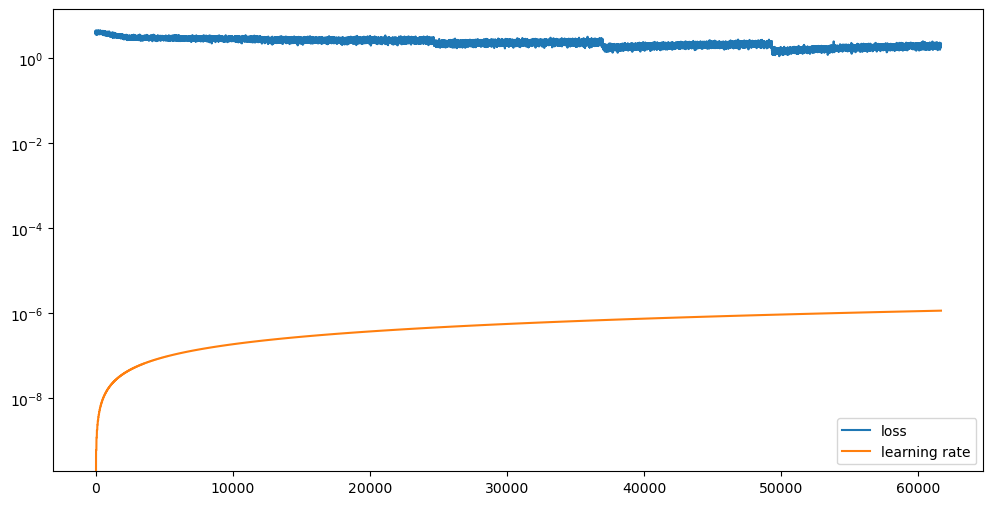

In [9]:
import numpy as np
import matplotlib.pyplot as plt

losses_np = np.array(losses)
lrs_np = np.array(lrs)

plt.figure(figsize=(12,6))
plt.plot(losses_np, label='loss')
plt.plot(lrs_np, label='learning rate')
plt.yscale('log')
plt.legend()
plt.show()

#### Inferência

Vamos a ver como o modelo faz piadas

In [100]:
sentence_joke = "JOKE:"
input_tokens_joke = tokenizer(sentence_joke, return_tensors="pt").to(device)
output_tokens_joke = model.generate(**input_tokens_joke)
decoded_output_joke = tokenizer.decode(output_tokens_joke[0], skip_special_tokens=True)

print(f"decoded joke: \n{decoded_output_joke}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/home/wallabot/miniconda3/envs/nlp/lib/python3.11/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


decoded joke: 
JOKE:!!!!!!!!!!!!!!!!!


Pode-se ver que você passa uma sequência com a palavra `joke` e ele retorna uma piada. Mas se você retornar outra sequência não

In [100]:
sentence_joke = "My dog is cute and"
input_tokens_joke = tokenizer(sentence_joke, return_tensors="pt").to(device)
output_tokens_joke = model.generate(**input_tokens_joke)
decoded_output_joke = tokenizer.decode(output_tokens_joke[0], skip_special_tokens=True)

print(f"decoded joke: \n{decoded_output_joke}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


decoded joke: 
My dog is cute and!!!!!!!!!!!!!!!


### Ajuste fino do GPT-2 para classificação de sentenças

Agora vamos fazer um treinamento com as bibliotecas do Hugging Face

#### Conjunto de Dados

Vamos a usar o conjunto de dados `imdb` de classificação de sentenças em positivas e negativas

In [1]:
from datasets import load_dataset

dataset = load_dataset("imdb")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Vamos vê-lo um pouco

In [2]:
dataset["train"].info

DatasetInfo(description='', citation='', homepage='', license='', features={'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name='parquet', dataset_name='imdb', config_name='plain_text', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=33435948, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'test': SplitInfo(name='test', num_bytes=32653810, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'unsupervised': SplitInfo(name='unsupervised', num_bytes=67113044, num_examples=50000, shard_lengths=None, dataset_name='imdb')}, download_checksums={'hf://datasets/imdb@e6281661ce1c48d982bc483cf8a173c1bbeb5d31/plain_text/train-00000-of-00001.parquet': {'num_bytes': 20979968, 'checksum': None}, 'hf://datasets/imdb@e6281661ce1c48d982bc483cf8a173c1bbeb5d31/plain_text/test-00000-of-00001.parquet': {'num_bytes': 20470363, 'checksum': None}, 'hf:

Vamos ver as funcionalidades que este conjunto de dados possui.

In [3]:
dataset["train"].info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

O conjunto de dados contém strings e classes. Além disso, existem dois tipos de classes, `pos` e `neg`. Vamos criar uma variável com o número de classes.

In [4]:
num_clases = len(dataset["train"].unique("label"))
num_clases

2

#### Tokenizador

Criamos o tokenizador

In [5]:
from transformers import GPT2Tokenizer

checkpoints = "openai-community/gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(checkpoints, bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>')
tokenizer.pad_token = tokenizer.eos_token

Agora que temos um tokenizador, podemos tokenizar o conjunto de dados, pois o modelo só entende tokens.

In [6]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

#### Modelo

Instanciamos o modelo

In [7]:
from transformers import GPT2ForSequenceClassification

model = GPT2ForSequenceClassification.from_pretrained(checkpoints, num_labels=num_clases).half()
model.config.pad_token_id = model.config.eos_token_id

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Avaliação

Criamos uma métrica de avaliação

In [100]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

#### Treinador

Criamos o treinador

In [8]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

#### Treinamento

Treinamos

In [25]:
trainer.train()

Step,Training Loss
500,0.379400
1000,0.000000
1500,0.000000
2000,0.000000
2500,0.000000
3000,0.000000
3500,0.000000
4000,0.000000
4500,0.000000


TrainOutput(global_step=4689, training_loss=0.04045845954294626, metrics={'train_runtime': 5271.3532, 'train_samples_per_second': 14.228, 'train_steps_per_second': 0.89, 'total_flos': 3.91945125888e+16, 'train_loss': 0.04045845954294626, 'epoch': 3.0})

#### Inferência

Testamos o modelo após treiná-lo

In [19]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_sentiment(sentence):
    inputs = tokenizer(sentence, return_tensors="pt").to(device)
    outputs = model(**inputs)
    prediction = outputs.logits.argmax(-1).item()
    return "positive" if prediction == 1 else "negative"

In [20]:
sentence = "I hate this movie!"
print(get_sentiment(sentence))

negative
